In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mplt
import pylab as plt
from matplotlib import rc
from pylab import figure, show, legend, xlabel, ylabel

In [13]:
df=pd.read_csv("manchas", header=None, sep="\s+",names= ['Año','Mes','Año-Mes','Manchas','X','Y'])
df.head(10)

,Año,Mes,Año-Mes,Manchas,X,Y
0,1749,1,1749.042,96.7,-1.0,-1
1,1749,2,1749.123,104.3,-1.0,-1
2,1749,3,1749.204,116.7,-1.0,-1
3,1749,4,1749.288,92.8,-1.0,-1
4,1749,5,1749.371,141.7,-1.0,-1
5,1749,6,1749.455,139.2,-1.0,-1
6,1749,7,1749.538,158.0,-1.0,-1
7,1749,8,1749.623,110.5,-1.0,-1
8,1749,9,1749.707,126.5,-1.0,-1
9,1749,10,1749.790,125.8,-1.0,-1


In [4]:
v = np.arange(0.0, 3213.0, 1.0)

In [5]:
df['T'] = pd.Series(v, index = None)

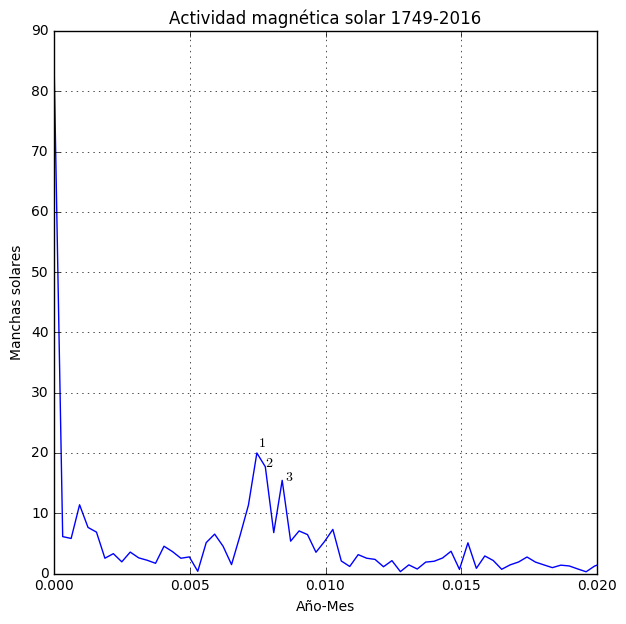

In [23]:
from scipy.fftpack import fft, fftfreq, fftshift
# number of signal points
N = 3213
# sample spacing
T = 1
x = df['Año-Mes']
y = df['Manchas']
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.xlim(0,.02)

plt.title('Actividad magnética solar 1749-2016')
plt.ylabel('Manchas solares')
plt.xlabel('Año-Mes')
plt.text(0.0075, 21, '$1$')
plt.text(0.007777, 17.7, '$2$')
plt.text(0.0085, 15.45, '$3$')
plt.grid()
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

In [7]:
a = np.absolute(yf)/N

In [24]:
#Máximos
print(np.where(a[:,]>15))
b= a[a[:,]>15]
b

(array([   0,   24,   25,   27, 3186, 3188, 3189]),)


array([ 82.92356054,  19.9936166 ,  17.709916  ,  15.45401894,
        15.45401894,  17.709916  ,  19.9936166 ])

In [25]:
#Frecuencias Principales
f1= xf[int(N/2 +24),]
f2= xf[int(N/2 +25),]
f3= xf[int(N/2 +27),]


In [10]:
#Obtención de periodos
print('Periodo 1:',1/(f1*12), 'Años')
print('Periodo 2:',1/(f2*12), 'Años')
print('Periodo 3:',1/(f3*12), 'Años')

Periodo 1: 11.15625 Años
Periodo 2: 10.71 Años
Periodo 3: 9.91666666667 Años


In [11]:
#Promedio de Periodos
(1/(f1*12)+1/(f2*12)+1/(f3*12))/3

10.594305555555556